### Задача 1
Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучший фильм за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

1. Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?
2. Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или Paramount Pictures и насколько больше?

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re

url = 'https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучший_фильм#Достижения_по_другим_номинациям_Оскара'
page = requests.get(url).text
soup = BeautifulSoup(page, 'lxml')

In [3]:
tables = soup.find_all('table',{'class':'wikitable'})
headers = tables[0].find_all('tr')[0].find_all('th')
print(headers)

[<th style="width:10%;">Год/Церемония
</th>, <th style="width:27%;">Фильм
</th>, <th style="width:27%;">Кинокомпания(и)
</th>, <th style="width:31%;">Продюсер(ы)
</th>, <th style="width:5%;">Ссылки
</th>]


In [4]:
yearData = list()
nameData = list()
compData = list()
prodData = list()
linkData = list()
yearData.append(headers[0].text.strip())
nameData.append(headers[1].text.strip())
compData.append(headers[2].text.strip())
prodData.append(headers[3].text.strip())
linkData.append(headers[4].text.strip())

for table in tables[:10] :
    rows = table.find_all('tr')[1:]
    for row in rows :
        tableData = row.find_all('td')
        if len(tableData) == 5 :
            yearMemory = tableData[0].text.split()[0].strip()
            yearData.append(yearMemory)
            nameData.append(re.findall(r'«(.+)»',tableData[1].text.strip())[0])
            compData.append(tableData[2].text.strip())
            prodData.append(tableData[3].text.strip())
            try :
                linkMemory = tableData[4].find_all('a')[0].get('href')    
            except IndexError:
                import numpy as np
                linkMemory = np.nan
            linkData.append(linkMemory)   
        elif len(tableData) == 3 :
            yearData.append(yearMemory)
            nameData.append(re.findall(r'«(.+)»',tableData[0].text.strip())[0])
            compData.append(tableData[1].text.strip())
            prodData.append(tableData[2].text.strip())
            linkData.append(linkMemory)
        else :
            nameData, compData, prodData = 'WRONG ROW'
            
f = open('tableFilm.csv', 'w', encoding = 'utf8')
for idx in range(len(yearData)):
    f.write(f'{yearData[idx]}\t{nameData[idx]}\t{compData[idx]}\t{prodData[idx]}\t{linkData[idx]}\n')  
f.close()

pd.set_option('display.max_colwidth', 40)
df = pd.read_csv('tableFilm.csv', sep='\t', encoding='utf8', header=0)
df

,Год/Церемония,Фильм,Кинокомпания(и),Продюсер(ы),Ссылки
0,1929,Крылья,"Paramount Pictures, Famous Players-L...",Люсьен Хаббард,#cite_note-2
1,1929,Рэкет,"Caddo, Paramount",Говард Хьюз,#cite_note-2
2,1929,Седьмое небо,Fox Film Corporation,Уильям Фокс,#cite_note-2
3,1930-I,Бродвейская мелодия,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен",#cite_note-3
4,1930-I,Алиби,"Feature Productions, United Artists",Роланд Уэст,#cite_note-3
...,...,...,...,...,...
558,2020,Джокер,NaN,"Тодд Филлипс, Брэдли Купер и Эмма Ти...",NaN
559,2020,Маленькие женщины,NaN,Эми Паскаль,NaN
560,2020,Брачная история,NaN,Ноа Баумбах и Дэвид Хейман,NaN
561,2020,1917,NaN,"Сэм Мендес, Пиппа Харрис, Джейн‑Энн ...",NaN


In [5]:
# замена NaN на значения

# v1
df.iloc[:,2] = df.iloc[:,2].fillna('No Company Info')

# v2
df['Ссылки'] = df['Ссылки'].replace(np.nan, 'No Link Info')

df

,Год/Церемония,Фильм,Кинокомпания(и),Продюсер(ы),Ссылки
0,1929,Крылья,"Paramount Pictures, Famous Players-L...",Люсьен Хаббард,#cite_note-2
1,1929,Рэкет,"Caddo, Paramount",Говард Хьюз,#cite_note-2
2,1929,Седьмое небо,Fox Film Corporation,Уильям Фокс,#cite_note-2
3,1930-I,Бродвейская мелодия,Metro-Goldwyn-Mayer,"Ирвинг Талберг, Лоуренс Уэйнгартен",#cite_note-3
4,1930-I,Алиби,"Feature Productions, United Artists",Роланд Уэст,#cite_note-3
...,...,...,...,...,...
558,2020,Джокер,No Company Info,"Тодд Филлипс, Брэдли Купер и Эмма Ти...",No Link Info
559,2020,Маленькие женщины,No Company Info,Эми Паскаль,No Link Info
560,2020,Брачная история,No Company Info,Ноа Баумбах и Дэвид Хейман,No Link Info
561,2020,1917,No Company Info,"Сэм Мендес, Пиппа Харрис, Джейн‑Энн ...",No Link Info


In [7]:
# Сколько раз были номинированы фильмы, созданные при участии Стивена Спилберга?

#v1
print(
    df.loc[df['Продюсер(ы)'].str.contains('Стивен Спилберг'),'Продюсер(ы)'].count()
    )

#v2
print(
    df['Продюсер(ы)'].str.contains('Стивен Спилберг').sum()
    )

#v3
column = list(df['Продюсер(ы)'])
print(
    len([string for string in column if 'Стивен Спилберг' in string])
    )

10
10
10


In [6]:
#  Фильмы какой компании получили больше Оскаров за лучший фильм: Warner Bros. или 
#  Paramount Pictures и насколько больше?

column = 'Кинокомпания(и)'
company1 = 'Warner Bros'
company2 = 'Paramount Pictures'

company1Score = df[column].str.contains(company1).sum()
company2Score = df[column].str.contains(company2).sum()

if company1Score > company2Score :
    print(company1,end='')
else :
    print(company2,end='')
print(f' получила больше Оскаров за лучший фильм. На {abs(company1Score - company2Score)} больше конкурента' )

Warner Bros получила больше Оскаров за лучший фильм. На 26 больше конкурента


### Задача 2

Дана страница https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль

Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) данные о номинантах и победителях премии Оскар за лучшую женскую роль за всю историю существования премии. Заметьте, на страничке эта информация в нескольких таблицах. По данным ответьте на вопросы. P.S. Результат нужно именно посчитать, если на странице в явном виде указан ответ на вопрос, просто выгрузить этот ответ нельзя:

    1. Какая актриса чаще всего номинировалась на Оскар?
    2. Насколько отличается количество номинаций самой часто номинировавшейся актрисы и второй по частоте?

In [9]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

url = 'https://ru.wikipedia.org/wiki/Премия_«Оскар»_за_лучшую_женскую_роль'
page = requests.get(url).text
soup = BeautifulSoup(page, 'lxml')


In [10]:
tables = soup.find_all('table',{'class':'wikitable'})
headers = tables[0].find_all('tr')[0].find_all('th')
headersList = [headers[i].text.strip() for i in range(len(headers))]
headersList.remove('Фото лауреата')

print(headersList)

['Церемония', 'Актриса', 'Фильм(ы)', 'Роль']


In [11]:
yearData = list()
nameData = list()
movienameData = list()
roleData = list()
yearData.append(headersList[0])
nameData.append(headersList[1])
movienameData.append(headersList[2])
roleData.append(headersList[3])

for table in tables :
    rows = table.find_all('tr')[1:]
    for row in rows :
        tableData = row.find_all('td')
        if ( len(tableData) == 5 ) and (tableData[4].get('rowspan') != '5' ): #в т.ч. обработка "кривой строки 200"
            yearMemory = tableData[0].text.split()[0].strip()
            yearData.append(yearMemory)
            nameMemory = tableData[2].text.lstrip('• ')
            nameData.append(nameMemory)
            movienameData.append(tableData[3].text.strip('«»'))
            roleData.append(tableData[4].text.strip())
        elif len(tableData) == 4 or len(tableData) == 5 : #в т.ч. обработка "кривой строки 200"
            yearMemory = tableData[0].text.split()[0].strip()
            yearData.append(yearMemory)
            nameData.append(tableData[1].text.lstrip('• '))
            movienameData.append(tableData[2].text.strip('«»'))
            roleData.append(tableData[3].text.strip())    
        elif len(tableData) == 3 :
            yearData.append(yearMemory)
            nameData.append(tableData[0].text.lstrip('• '))
            movienameData.append(tableData[1].text.strip('«»'))
            roleData.append(tableData[2].text.strip())
        elif len(tableData) == 2 :
            yearData.append(yearMemory)
            nameData.append(nameMemory)
            movienameData.append(tableData[0].text.strip('«»'))
            roleData.append(tableData[1].text.strip())             
        else :
            print(len(tableData),tableData)
            raise IndexError
            
f = open('tableActress.csv', 'w', encoding = 'utf8')
for idx in range(len(yearData)):
    f.write(f'{yearData[idx]}\t{nameData[idx]}\t{movienameData[idx]}\t{roleData[idx]}\n')  
f.close()

pd.set_option('display.max_colwidth', 40, 'display.max_rows', None )
df = pd.read_csv('tableActress.csv', sep='\t', encoding='utf8', header=0)
df

,Церемония,Актриса,Фильм(ы),Роль
0,1-я,Джанет Гейнор,Седьмое небо,Дайана
1,1-я,Джанет Гейнор,Уличный ангел,Анджела
2,1-я,Джанет Гейнор,Восход солнца,жена
3,1-я,Луиза Дрессер,Корабль приплывает,миссис Плезник
4,1-я,Глория Свенсон,Сэди Томпсон,Сэди Томпсон
5,2-я,Мэри Пикфорд,Кокетка,Норма Безант
6,2-я,Рут Чаттертон,Мадам Икс,Жаклин Флорио
7,2-я,Бетти Компсон,Зазывала,Кэрри
8,2-я,Джинн Иглс (посмертно),Письмо,Лесли Кросби
9,2-я,Коринна Гриффит,Божественная леди,леди Эмма Гамильтон


In [16]:
# 1. Какая актриса чаще всего номинировалась на Оскар?

from collections import Counter
s = df['Актриса']

#v1
print(s.mode().iloc[0])

#v2
print(s.value_counts().index[0])

#v3
print(Counter(s).most_common(1)[0][0])

Мерил Стрип
Мерил Стрип
Мерил Стрип


In [11]:
# 2. Насколько отличается количество номинаций самой часто
# номинировавшейся актрисы и второй по частоте?

#v1
print(
    s.value_counts().values[0] - s.value_counts().values[1]
    )

#v2
print(
    Counter(s).most_common(2)[0][1] - Counter(s).most_common(2)[1][1]
    )

5
5


### Задача 3

Дана страница https://www.worldometers.info/world-population/world-population-by-year/

На ней представлены данные о росте численности населения Земли. Используя удобные для вас модули Python (Например requests, bs4 и pandas, но можно и любые другие) сгрузить в удобную для вас структуру данных (например pandas-табличку) необходимые данные и нарисовать графики ежегодного прироста городского населения и ежегодного прироста общего населения, начиная с 1951 года.

In [12]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

url = 'https://www.worldometers.info/world-population/world-population-by-year/'
page = requests.get(url).text
soup = BeautifulSoup(page, 'lxml')

In [13]:
table = soup.find_all('table',{'class':'table table-hover table-condensed'})

headers = table[0].find_all('tr')[0].find_all('th')
headersTuple = tuple((str.text.replace(',','.').strip() for str in headers))

print(headersTuple)

('Year', 'World Population', 'YearlyChange', 'NetChange', 'Density(P/Km²)', 'UrbanPop', 'UrbanPop %')


In [14]:
data = list()
rows = table[0].find_all('tr')[1:]
for row in rows :
    tableData = row.find_all('td')
    rowTuple = tuple((str.text.replace(',','').strip() for str in tableData))
    data.append(rowTuple)
df = pd.DataFrame(data, columns=headersTuple)

pd.set_option('display.max_colwidth', 40, 'display.max_rows', 10 )

# numeric
df[['Year','World Population', 'UrbanPop']] = df[['Year','World Population', 'UrbanPop']].apply(pd.to_numeric)
df

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
0,2020,7794798739,1.05 %,81330639,52,4.378994e+09,56 %
1,2019,7713468100,1.08 %,82377060,52,4.299439e+09,56 %
2,2018,7631091040,1.10 %,83232115,51,4.219817e+09,55 %
3,2017,7547858925,1.12 %,83836876,51,4.140189e+09,55 %
4,2016,7464022049,1.14 %,84224910,50,4.060653e+09,54 %
...,...,...,...,...,...,...,...
89,-1000,50000000,,,,NaN,
90,-2000,27000000,,,,NaN,
91,-3000,14000000,,,,NaN,
92,-4000,7000000,,,,NaN,


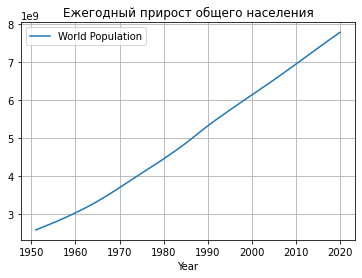

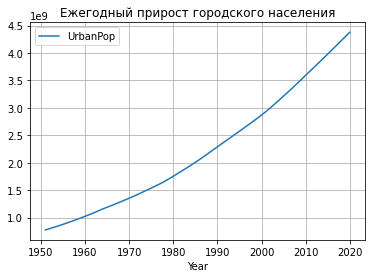

In [16]:
yearSeries = df.loc[df['Year']>1950]

p = yearSeries.plot(y='World Population', x='Year',title='Eжегодный прирост общего населения',grid=True)
p = yearSeries.plot(y='UrbanPop', x='Year', title='Eжегодный прирост городского населения',grid=True)